In [3]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np

In [4]:
imports = pd.read_csv('import_sections.csv')
exports = pd.read_csv('export_sections_final.csv')
GDP = pd.read_csv('GDP_final.csv')

In [5]:
print(imports.shape)
print(exports.shape)

(101051, 10)
(184755, 6)


In [28]:
imports

,HSCode,Commodity,value,country,year,State,Port,Month,quarter,Section
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010,Odisha,Paradip Port,March,Q1,II
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010,West Bengal,Haldia Port,December,Q4,II
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010,Tamil Nadu,Ennore Port,October,Q4,II
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010,West Bengal,Haldia Port,April,Q2,II
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010,Goa,Mormugao Port,February,Q1,II
...,...,...,...,...,...,...,...,...,...,...
101046,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",0.02,ZIMBABWE,2021,Karnataka,Mangalore Port,August,Q3,XVI
101047,85,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,0.00,ZIMBABWE,2021,West Bengal,Haldia Port,July,Q3,XVI
101048,90,"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURIN...",0.03,ZIMBABWE,2021,Maharashtra,JNPT (Nhava Sheva),March,Q1,XVIII
101049,97,WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.,0.00,ZIMBABWE,2021,Maharashtra,JNPT (Nhava Sheva),February,Q1,XXI


In [6]:
df1 = imports['value']
df2 = GDP['GDP (Million $)']
df3 = GDP['Population']

In [ ]:
import statsmodels.api as sm

<function matplotlib.pyplot.show(close=None, block=None)>

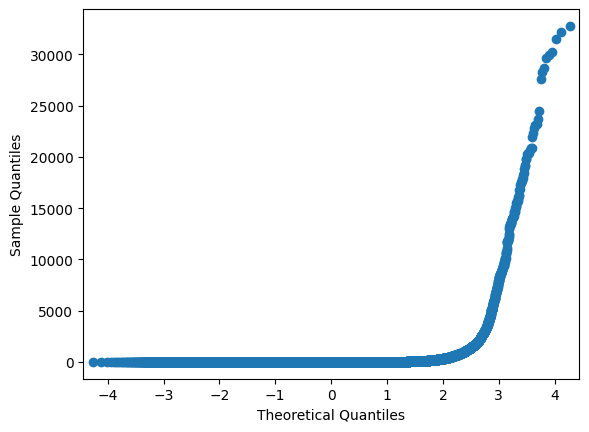

In [52]:
sm.qqplot(imports['value'])
plt.show

**data not normally distributed**

In [15]:
t,p = stats.ttest_rel(df1,df2)

In [ ]:
contigency_table =  pd.crosstab(df1,df2)

In [ ]:
chi2 , p ,dof, expected = chi2_contingency(contigency_table)

In [ ]:
chi2
expected

In [ ]:
p

In [19]:
np.corrcoef(df2,df3)

array([[1.        , 0.96474512],
       [0.96474512, 1.        ]])

**here population(GDP/PCI) and GDP is highly correlated**

In [21]:
r = np.corrcoef(df2,df3)[0][1]
r

0.9647451206720897

In [35]:
import_lists = imports.groupby(imports['year'])['value'].sum()

In [36]:
import_lists

year
2010    369762.25
2011    489311.81
2012    490730.07
2013    450192.99
2014    448026.63
2015    381000.97
2016    384350.29
2017    465574.02
2018    514071.33
2019    474701.75
2020    394428.98
2021    613045.41
Name: value, dtype: float64

In [37]:
import scipy.stats as stats
r,p= stats.pearsonr(df2,import_lists)
r

0.5182632811482315

In [10]:
export_lists = exports.groupby(exports['year'])['value'].sum()
export_lists

year
2010    249801.18
2011    305948.28
2012    300384.32
2013    314388.61
2014    310321.02
2015    262274.30
2016    275835.27
2017    303507.85
2018    330058.64
2019    313341.14
2020    291789.46
2021    421984.37
Name: value, dtype: float64

In [39]:
from scipy.stats import ttest_ind
r,p = ttest_ind(import_lists,export_lists)
print(r)
print(p)

6.351237117286995
2.164027765070777e-06


In [41]:
a=0.05
if p<a:
    print("There is a significant difference of mu between the values of the import and export.")
else:
    print("There is no significant difference of mu between the value of the import and export")

There is a significant difference of mu between the values of the import and export.


In [42]:
import scipy.stats as stats
r,p= stats.pearsonr(df2,export_lists)
r

0.652124051886666

In [ ]:
r,p = ttest_rel(section)

In [45]:
from scipy import stats
h0="The median is equal across all groups."
h1="The median is not equal across all groups."
statistics , p = stats.kruskal(df2,import_lists,export_lists)
statistics

30.294294294294303

In [47]:
if p<a:
    print(f"null hypothesis reject hence : {h1}")
else : 
    print(f"fail to reject null hypothesis hence : {h0}")

null hypothesis reject hence : The median is not equal across all groups.


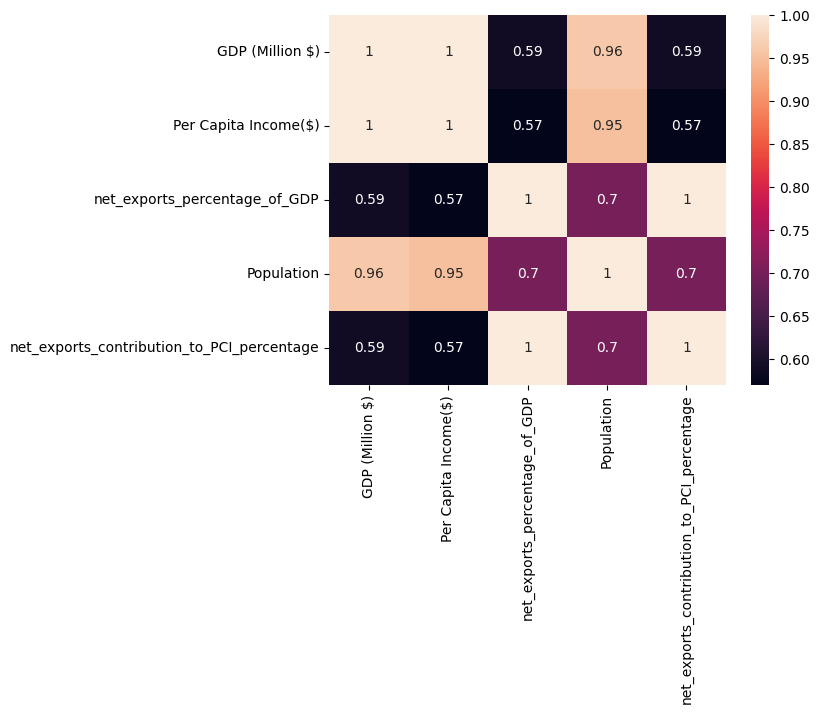

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
df = GDP.drop(['Unnamed: 0','year','net_exports','net_exports_per_capita'],axis=1)
# df = df2.concate(export_lists)
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [25]:
df

,Unnamed: 0,GDP (Million $),Per Capita Income($),net_exports_percentage_of_GDP,Population,net_exports_per_capita,net_exports_contribution_to_PCI_percentage
0,0,1675620,1358,-7.159205,1233.888071,-97.22,-7.159057
1,1,1823050,1458,-10.058064,1250.377229,-146.65,-10.058299
2,2,1827640,1444,-10.414838,1265.678670,-150.39,-10.414820
3,3,1856720,1450,-7.314209,1280.496552,-106.06,-7.314483
4,4,2039130,1574,-6.753155,1295.508259,-106.29,-6.752859
5,5,2103590,1606,-5.644002,1309.831880,-90.64,-5.643836
6,6,2294800,1733,-4.728735,1324.177726,-81.95,-4.728794
7,7,2651470,1981,-6.112314,1338.450278,-121.08,-6.112065
8,8,2702930,1998,-6.807897,1352.817818,-136.02,-6.807808
9,9,2831550,2072,-5.698667,1366.578185,-118.08,-5.698842


In [33]:
im = imports.groupby(['Section','Commodity'])[['Commodity']].count()
im

Commodity
Section Commodity                                                    
I       DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDIB...        564
        FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUATI...        596
        LIVE ANIMALS.                                             605
        MEAT AND EDIBLE MEAT OFFAL.                               207
        PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIF...        561
...                                                               ...
XVIII   OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING...       1896
XX      FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPOR...       1328
        MISCELLANEOUS MANUFACTURED ARTICLES.                     1211
        TOYS, GAMES AND SPORTS REQUISITES; PARTS AND AC...        973
XXI     WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.             711

[98 rows x 1 columns]

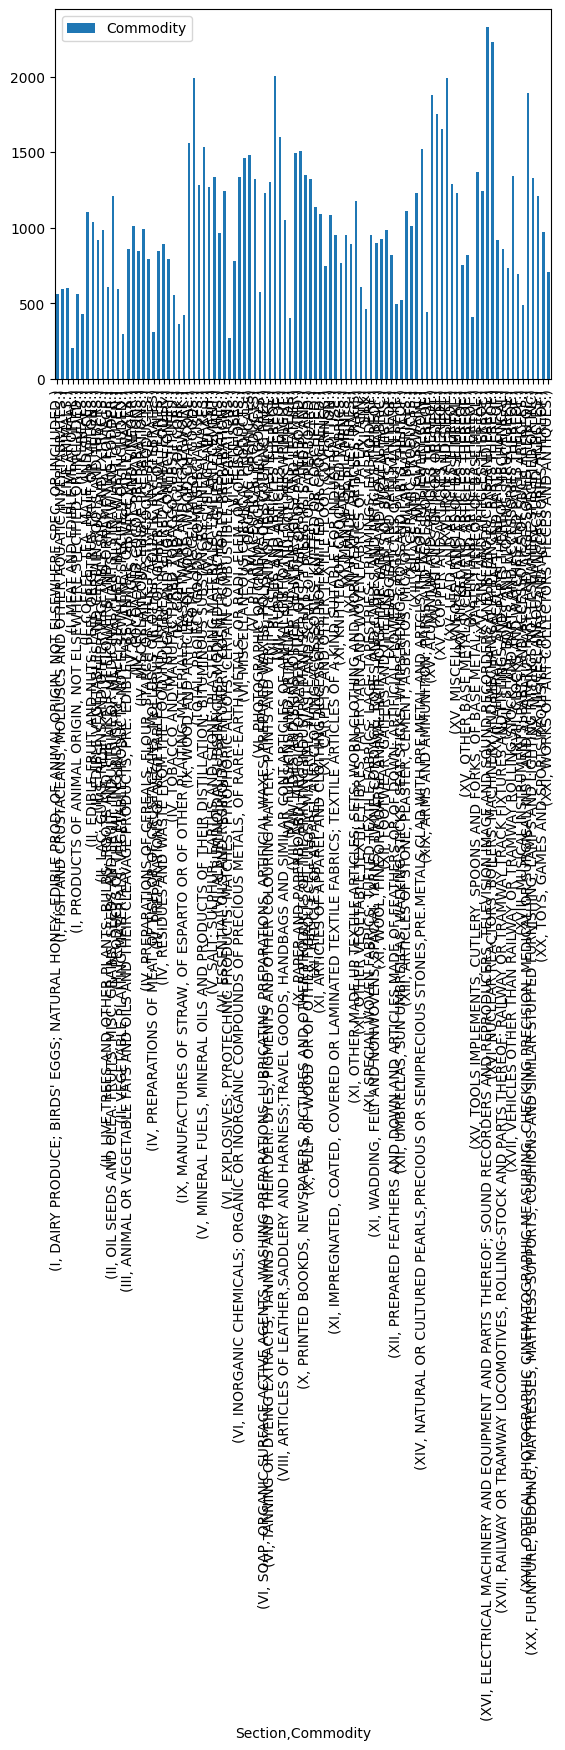

<Figure size 1000x600 with 0 Axes>

In [45]:
im.plot(kind='bar',stacked=True)
plt.figure(figsize=(10,6))
# plt.xticks(rotation=90, ha='center')
plt.show()

In [53]:
im.to_csv('section_wise_commodity',index='false')